# Age and Gender Classification Using CNNs

## Setting up

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import caffe
import os

Set up paths, scripts and models, mean pixel and labels file names.

In [19]:
# Make sure that caffe is on the python path:
caffe_root = '/opt/caffe/'  
models_path = '/deeplearning/Models/'
data_path = '/deeplearning/Datasets/DemoImages/'
sys.path.insert(0, caffe_root + 'python')
# model location
model_path  = 'AgeGenderNets/'
# model(s) name(s)
model_age_name = 'age_net.caffemodel'
model_age_config_name = 'deploy_age.prototxt'
model_gender_name = 'gender_net.caffemodel'
model_gender_config_name = 'deploy_gender.prototxt'

model_age_configuration = models_path + model_path + model_age_config_name
model_age = models_path + model_path + model_age_name
print model_age

model_gender_configuration = models_path + model_path + model_gender_config_name
model_gender = models_path + model_path + model_gender_name
print model_gender

# mean image location
mean_name='mean.binaryproto'
mean_image_fname = models_path +model_path + mean_name
print mean_image_fname

/deeplearning/Models/AgeGenderNets/age_net.caffemodel
/deeplearning/Models/AgeGenderNets/gender_net.caffemodel
/deeplearning/Models/AgeGenderNets/mean.binaryproto


## Loading the mean image

In [20]:
proto_data = open(mean_image_fname, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

## Image parameters

In [21]:
channels  = 3
gray_range = 255
image_size = 256

## Load the age network

In [22]:
age_net = caffe.Classifier(model_age_configuration, model_age, mean=mean, channel_swap=(2,1,0), raw_scale=gray_range,
                       image_dims=(image_size, image_size))

(1, 3, 227, 227)


## Load the gender network

In [23]:
gender_net = caffe.Classifier(model_gender_configuration, model_gender, mean=mean, channel_swap=(2,1,0), raw_scale=gray_range,
                       image_dims=(image_size, image_size))

(1, 3, 227, 227)


## Labels

In [24]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

## Reading and plotting an example input image from the test dataset

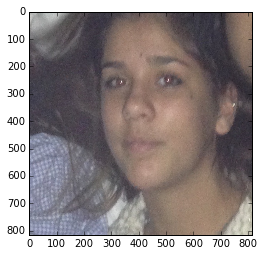

In [32]:
example_image1 = data_path + 'female13.jpg'
input_image1 = caffe.io.load_image(example_image1)
_ = plt.imshow(input_image1)

## Age and gender prediction

In [33]:
prediction1 = age_net.predict([input_image1]) 
print 'Predicted age:', age_list[prediction1[0].argmax()]

prediction1 = gender_net.predict([input_image1]) 
print 'Predicted gender:', gender_list[prediction1[0].argmax()]

Predicted age: (8, 12)
Predicted gender: Female


## Reading and plotting another example input image

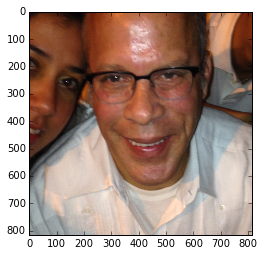

In [34]:
example_image2 = data_path + 'male45.jpg'
input_image2 = caffe.io.load_image(example_image2)
_ = plt.imshow(input_image2)

## Age and gender prediction

In [35]:
prediction2 = age_net.predict([input_image2]) 
print 'Predicted age:', age_list[prediction2[0].argmax()]

prediction2 = gender_net.predict([input_image2]) 
print 'Predicted gender:', gender_list[prediction2[0].argmax()]

predicted age: (48, 53)
predicted gender: Male


## Reading and plotting random images from Internet - not a face

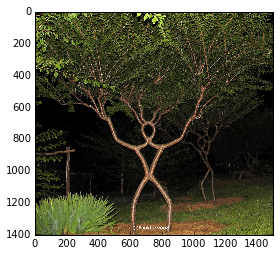

In [37]:
example_image3 = data_path + 'tree_people_shapes.jpg'
input_image3 = caffe.io.load_image(example_image3)
_ = plt.imshow(input_image3)

## Age and gender prediction

In [38]:
prediction3 = age_net.predict([input_image3]) 
print 'Predicted age:', age_list[prediction3[0].argmax()]

prediction3 = gender_net.predict([input_image3]) 
print 'Predicted gender:', gender_list[prediction3[0].argmax()]

Predicted age: (60, 100)
Predicted gender: Male


## Reading and plotting challenging images from Internet - large occlusion

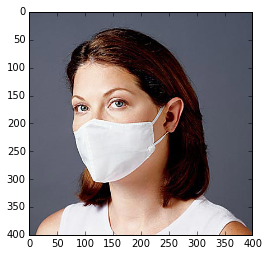

In [39]:
example_image4 = data_path + 'face_ocluded_female.jpg'
input_image4 = caffe.io.load_image(example_image4)
_ = plt.imshow(input_image4)

## Age and gender prediction

In [40]:
prediction4 = age_net.predict([input_image4]) 
print 'Predicted age:', age_list[prediction4[0].argmax()]

prediction4 = gender_net.predict([input_image4]) 
print 'Predicted gender:', gender_list[prediction4[0].argmax()]

Predicted age: (60, 100)
Predicted gender: Female


## More challenging images from Internet - partial view

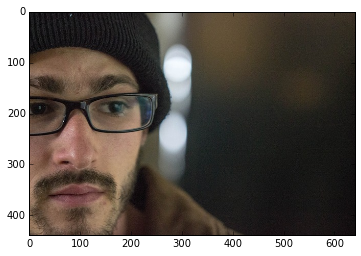

In [41]:
example_image5 = data_path + 'man_glasses_beard_occluded.jpg'
input_image5 = caffe.io.load_image(example_image5)
_ = plt.imshow(input_image5)

## Age and gender prediction

In [53]:
prediction5 = age_net.predict([input_image5]) 
print 'Predicted age:', age_list[prediction5[0].argmax()]

prediction5 = gender_net.predict([input_image5]) 
print 'Predicted gender:', gender_list[prediction5[0].argmax()]

Predicted age: (25, 32)
Predicted gender: Male


## More challenging images from Internet - webcam

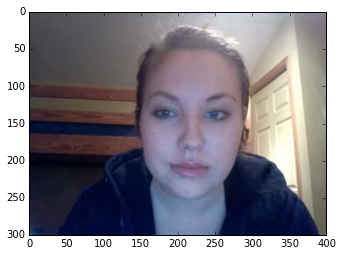

In [57]:
example_image6 = data_path + 'girl_webcam.jpg'
input_image6 = caffe.io.load_image(example_image6)
_ = plt.imshow(input_image6)

## Age and gender prediction

In [58]:
prediction6 = age_net.predict([input_image6]) 
print 'Predicted age:', age_list[prediction6[0].argmax()]

prediction6 = gender_net.predict([input_image6]) 
print 'Predicted gender:', gender_list[prediction6[0].argmax()]

Predicted age: (8, 12)
Predicted gender: Male


## More challenging images from Internet - same person, many webcam images

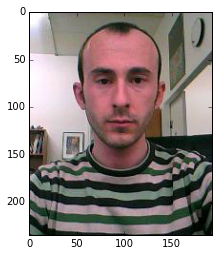

In [59]:
example_image = data_path + 'man_webcam1.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [60]:
prediction = age_net.predict([input_image]) 
print 'Predicted age:', age_list[prediction[0].argmax()]

prediction = gender_net.predict([input_image]) 
print 'Predicted gender:', gender_list[prediction[0].argmax()]

Predicted age: (25, 32)
Predicted gender: Male


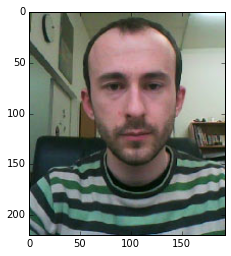

In [61]:
example_image = data_path + 'man_webcam2.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [62]:
prediction = age_net.predict([input_image]) 
print 'Predicted age:', age_list[prediction[0].argmax()]

prediction = gender_net.predict([input_image]) 
print 'Predicted gender:', gender_list[prediction[0].argmax()]

Predicted age: (25, 32)
Predicted gender: Male


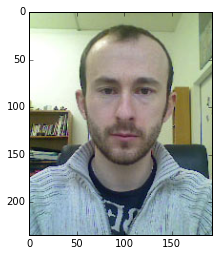

In [63]:
example_image = data_path + 'man_webcam3.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [64]:
prediction = age_net.predict([input_image]) 
print 'Predicted age:', age_list[prediction[0].argmax()]

prediction = gender_net.predict([input_image]) 
print 'Predicted gender:', gender_list[prediction[0].argmax()]

Predicted age: (25, 32)
Predicted gender: Male


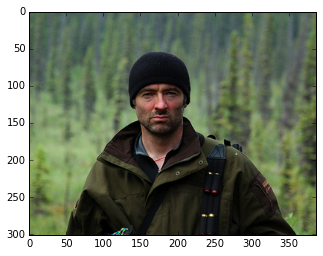

In [66]:
example_image = data_path + 'man_wild.png'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [67]:
prediction = age_net.predict([input_image]) 
print 'Predicted age:', age_list[prediction[0].argmax()]

prediction = gender_net.predict([input_image]) 
print 'Predicted gender:', gender_list[prediction[0].argmax()]

Predicted age: (60, 100)
Predicted gender: Male


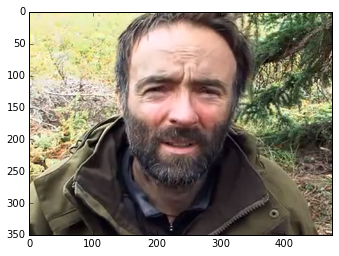

In [69]:
example_image = data_path + 'man_wild_zoom.png'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [70]:
prediction = age_net.predict([input_image]) 
print 'Predicted age:', age_list[prediction[0].argmax()]

prediction = gender_net.predict([input_image]) 
print 'Predicted gender:', gender_list[prediction[0].argmax()]

Predicted age: (25, 32)
Predicted gender: Male


## Somebody we all recognize ;-)

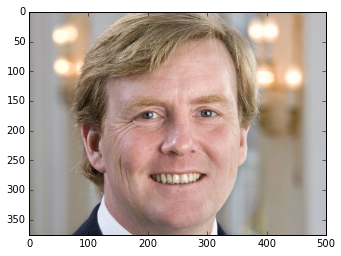

In [55]:
example_image10 = data_path + 'wa.jpg'
input_image10 = caffe.io.load_image(example_image10)
_ = plt.imshow(input_image10)

## Does the CNN also recognizes?

In [56]:
prediction10 = age_net.predict([input_image10]) 
print 'Predicted age:', age_list[prediction10[0].argmax()]

prediction10 = gender_net.predict([input_image10]) 
print 'Predicted gender:', gender_list[prediction10[0].argmax()]

Predicted age: (25, 32)
Predicted gender: Male
